# Example 5: Do Smaller Countries Perform Better Per Athlete?

Tasks:
* split countries into population quantiles
* compare medals per athlete across quantiles
* Run ANOVA or Kriskal-Wallis test

Visualizations:
* boxplots
* mean comparison bar chart

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
file_path = 'C:/Users/viole/dev/analytics/kaggle/olympics-data-analysis/data/olympic_countries_efficiency.csv'
df = pd.read_csv(file_path)
df.head()

,NOC,ISO3,Year,population,gdp_per_capita,income_group,host_country,athletes_sent,sports_participated,events_participated,female_athlete_percentage,prev_total_medals,prev_medals_per_athlete,Gold,Silver,Bronze,total_medals,medals_per_athlete
0,AFG,AFG,2004,23560654.0,221.763654,Low income,0,5,4,5,40.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,AFG,AFG,2008,26482622.0,381.733238,Low income,0,4,2,4,25.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.250000
2,AFG,AFG,2012,30560034.0,651.417134,Low income,0,6,4,6,16.666667,1.0,0.250000,0.0,0.0,1.0,1.0,0.166667
3,AFG,AFG,2016,34700612.0,522.082216,Low income,0,3,2,3,33.333333,1.0,0.166667,0.0,0.0,0.0,0.0,0.000000
4,ALB,ALB,1992,3247039.0,200.852220,Low income,0,7,4,8,22.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [23]:
df.columns

Index(['NOC', 'ISO3', 'Year', 'population', 'gdp_per_capita', 'income_group',
       'host_country', 'athletes_sent', 'sports_participated',
       'events_participated', 'female_athlete_percentage', 'prev_total_medals',
       'prev_medals_per_athlete', 'Gold', 'Silver', 'Bronze', 'total_medals',
       'medals_per_athlete'],
      dtype='str')

In [24]:
# Keep only columns needed, create a copy of df
df_small = df[[
    'NOC',
    'Year',
    'population',
    'athletes_sent',
    'total_medals'
]].copy()

df_small.head()

,NOC,Year,population,athletes_sent,total_medals
0,AFG,2004,23560654.0,5,0.0
1,AFG,2008,26482622.0,4,1.0
2,AFG,2012,30560034.0,6,1.0
3,AFG,2016,34700612.0,3,0.0
4,ALB,1992,3247039.0,7,0.0


In [25]:
# Create quantiles
df_small['pop_quantile'] = pd.qcut(
    df_small['population'],
    q=4,
    labels=[
        'Q1_Smallest',
        'Q2',
        'Q3',
        'Q4_Largest'
    ]
)

# Check for roughly even distribution
df_small['pop_quantile'].value_counts()

pop_quantile
Q1_Smallest    62
Q2             62
Q3             62
Q4_Largest     62
Name: count, dtype: int64

In [26]:
# Cutoff Values
pd.qcut(df_small['population'], q=4).unique()

[(9857307.0, 25731414.25], (25731414.25, 1387790000.0], (29435.999, 4224168.5], (4224168.5, 9857307.0]]
Categories (4, interval[float64, right]): [(29435.999, 4224168.5] < (4224168.5, 9857307.0] < (9857307.0, 25731414.25] < (25731414.25, 1387790000.0]]

In [27]:
# Comput total medals per athlete
df_small['medals_per_athlete'] = df_small['total_medals'] / df_small['athletes_sent']

df_small.head()

,NOC,Year,population,athletes_sent,total_medals,pop_quantile,medals_per_athlete
0,AFG,2004,23560654.0,5,0.0,Q3,0.000000
1,AFG,2008,26482622.0,4,1.0,Q4_Largest,0.250000
2,AFG,2012,30560034.0,6,1.0,Q4_Largest,0.166667
3,AFG,2016,34700612.0,3,0.0,Q4_Largest,0.000000
4,ALB,1992,3247039.0,7,0.0,Q1_Smallest,0.000000


In [28]:
# Compare means across quantiles
quartile_averages_df = df_small.groupby(
    'pop_quantile'
)['medals_per_athlete'].mean().reset_index()

quartile_averages_df.head()

,pop_quantile,medals_per_athlete
0,Q1_Smallest,0.020360
1,Q2,0.044445
2,Q3,0.095548
3,Q4_Largest,0.137506


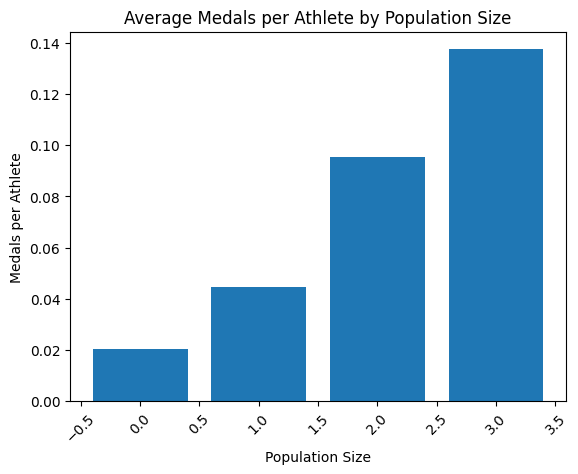

In [29]:
# Bar graph of mean of each quartile
plt.bar(
    quartile_averages_df.index,
    quartile_averages_df['medals_per_athlete']
)
plt.xlabel('Population Size')
plt.ylabel('Medals per Athlete')
plt.title('Average Medals per Athlete by Population Size')
plt.xticks(rotation=45)
plt.show()

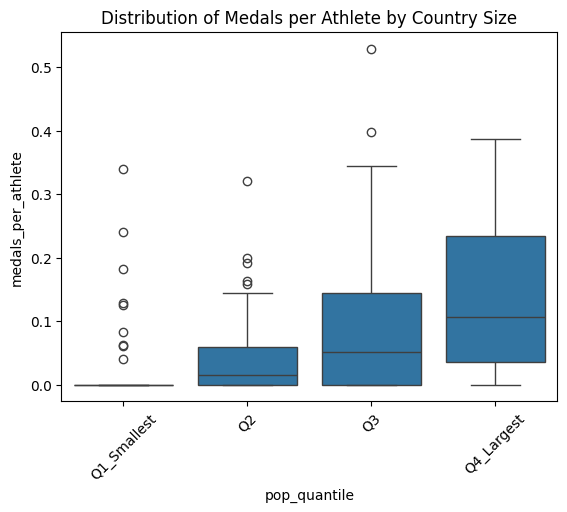

In [30]:
# Boxplot of medals per athlete by population size
sns.boxplot(
    data=df_small,
    x='pop_quantile',
    y='medals_per_athlete'
)

plt.title('Distribution of Medals per Athlete by Country Size')
plt.xticks(rotation=45)
plt.show()

No, smaller countries do not perform better than larger countries. The mean, and max steadily increases as population quantile increase. However, smaller countries may have more outlier.